<a href="https://colab.research.google.com/github/MatheusRobles/Santander_Coders_Tecnicas_de_Prog_II/blob/main/Ex_Aula_2/Exercicios_Aula2_Estrutura_tecnicas_de_prog_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/MatheusRobles/Santander_Coders_Tecnicas_de_Prog_II/main/Ex_Aula_2/2004-2021.tsv', sep = '\t')

In [85]:
df.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2004-05-09,2004-05-09,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133
1,2004-05-09,2004-05-09,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115
2,2004-05-09,2004-05-09,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098
3,2004-05-09,2004-05-09,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143
4,2004-05-09,2004-05-09,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082


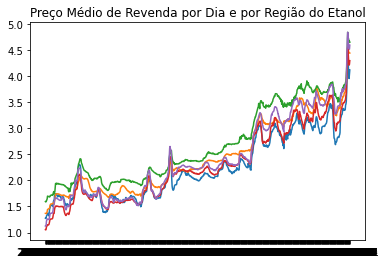

In [13]:
etanol_df = df[df['PRODUTO'] == 'ETANOL HIDRATADO']
etanol_pivot = etanol_df.pivot_table(values='PREÇO MÉDIO REVENDA', index='DATA FINAL', columns='REGIÃO')
for coluna in etanol_pivot.columns:
    plt.plot(etanol_pivot.index, etanol_pivot[coluna], label=coluna)

plt.title('Preço Médio de Revenda por Dia e por Região do Etanol')
plt.show()

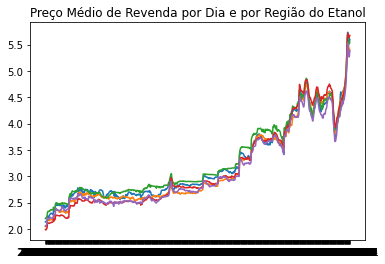

In [14]:
etanol_df = df[df['PRODUTO'] == 'GASOLINA COMUM']
etanol_pivot = etanol_df.pivot_table(values='PREÇO MÉDIO REVENDA', index='DATA FINAL', columns='REGIÃO')
for coluna in etanol_pivot.columns:
    plt.plot(etanol_pivot.index, etanol_pivot[coluna], label=coluna)

plt.title('Preço Médio de Revenda por Dia e por Região do Etanol')
plt.show()

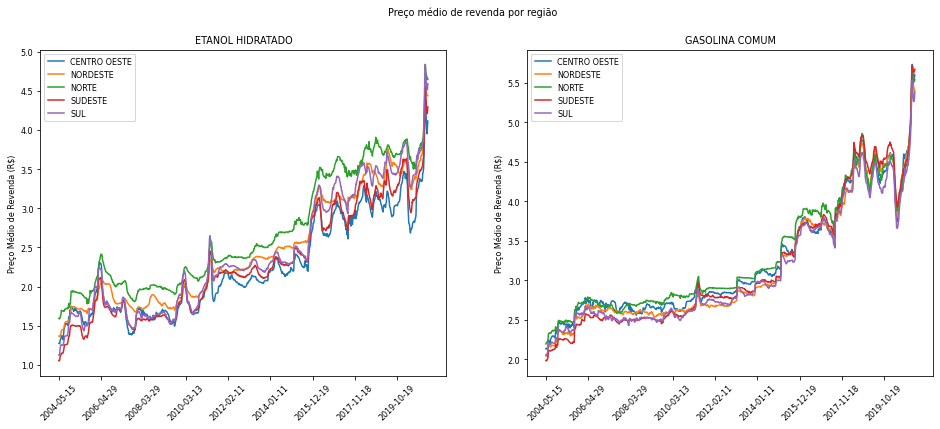

In [54]:
import matplotlib.pyplot as plt

etanol_df = df[df['PRODUTO'] == 'ETANOL HIDRATADO']
etanol_pivot = etanol_df.pivot_table(values='PREÇO MÉDIO REVENDA', index='DATA FINAL', columns='REGIÃO')

gasolina_df = df[df['PRODUTO'] == 'GASOLINA COMUM']
gasolina_pivot = gasolina_df.pivot_table(values='PREÇO MÉDIO REVENDA', index='DATA FINAL', columns='REGIÃO')
# Para o gráfico de Etanol
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

for coluna in etanol_pivot.columns:
    ax1.plot(etanol_pivot.index, etanol_pivot[coluna], label=coluna)

ax1.set_title('ETANOL HIDRATADO')
ax1.set_ylabel('Preço Médio de Revenda (R$)')
ax1.set_xticks(etanol_pivot.index[::100])
ax1.set_xticklabels(etanol_pivot.index[::100], rotation=45)
ax1.legend()

# Para o gráfico de Gasolina
for coluna in gasolina_pivot.columns:
    ax2.plot(gasolina_pivot.index, gasolina_pivot[coluna], label=coluna)

ax2.set_title('GASOLINA COMUM')
ax2.set_ylabel('Preço Médio de Revenda (R$)')
ax2.set_xticks(gasolina_pivot.index[::100])
ax2.set_xticklabels(gasolina_pivot.index[::100], rotation=45)
ax2.legend()

plt.suptitle('Preço médio de revenda por região')
plt.show()

Preço médio em 2020 dos preços do Etanol e da Gasolina por região

<Figure size 1152x432 with 0 Axes>

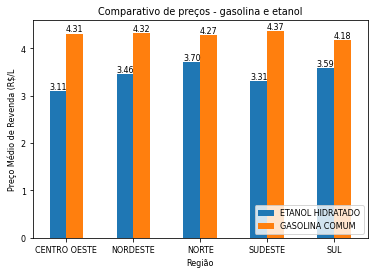

In [121]:
df['DATA FINAL'] = pd.to_datetime(df['DATA INICIAL'])
df_2020 = df[df['DATA FINAL'].dt.year == 2020]

etanol_gasolina_df = df_2020[df_2020['PRODUTO'].isin(['ETANOL HIDRATADO', 'GASOLINA COMUM'])]

etanol_gasolina_mean = etanol_gasolina_df.pivot_table(values='PREÇO MÉDIO REVENDA', index='REGIÃO', columns='PRODUTO')

plt.figure(figsize=(16,6))
ax = etanol_gasolina_mean.plot(kind='bar')
ax.bar_label(ax.containers[0], fmt='%.2f')
ax.bar_label(ax.containers[1], fmt='%.2f')
plt.title('Comparativo de preços - gasolina e etanol')
plt.ylabel('Preço Médio de Revenda (R$/L')
plt.xlabel('Região')
ax.set_xticklabels(etanol_gasolina_mean.index, rotation = 0)
ax.legend(loc='lower right', bbox_to_anchor=(1.0, 0.0))
plt.show()


Total consolidado de postos para cada estado


In [89]:
estados = df.groupby('ESTADO')['NÚMERO DE POSTOS PESQUISADOS'].sum().sort_values()
estados

ESTADO
AMAPA                    80007
RORAIMA                  90673
ACRE                    166498
SERGIPE                 175102
TOCANTINS               224228
ALAGOAS                 263679
PIAUI                   272968
DISTRITO FEDERAL        280785
RONDONIA                304550
RIO GRANDE DO NORTE     341282
PARAIBA                 367892
AMAZONAS                370566
MARANHAO                407182
MATO GROSSO DO SUL      471049
MATO GROSSO             504607
PARA                    518395
ESPIRITO SANTO          589926
CEARA                   793784
PERNAMBUCO              963683
GOIAS                  1027826
SANTA CATARINA         1129045
BAHIA                  1297308
RIO GRANDE DO SUL      1813356
PARANA                 1863723
RIO DE JANEIRO         2050778
MINAS GERAIS           3061073
SAO PAULO              7279948
Name: NÚMERO DE POSTOS PESQUISADOS, dtype: int64

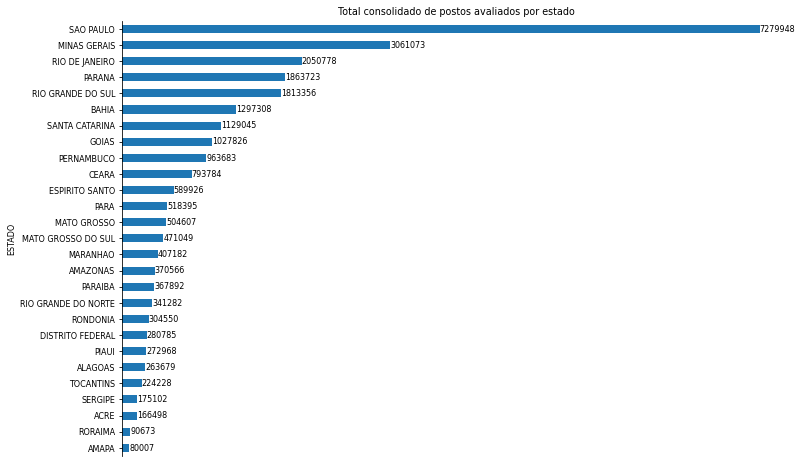

In [117]:
plt.figure(figsize=(12, 8))
ax = estados.plot(kind='barh')
ax.bar_label(ax.containers[0], fmt='%.0f')
ax.spines[['right', 'top', 'bottom']].set_visible(False)
ax.get_xaxis().set_visible(False)
plt.title('Total consolidado de postos avaliados por estado')
plt.show()

Relação entre preço da gasolina e do etanol (nível Brasil)

Text(0, 0.5, 'Preço médio de revenda (gasolina)')

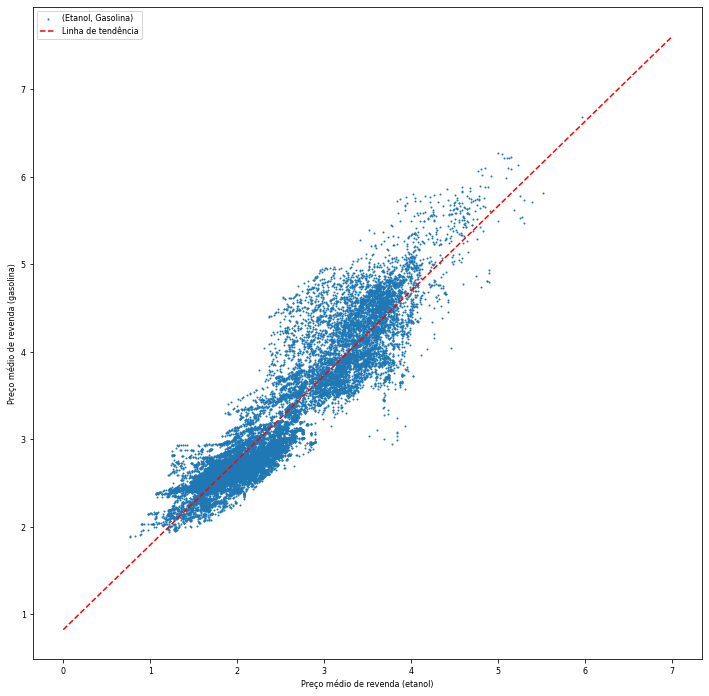

In [119]:
import numpy as np
from scipy.stats import linregress

etanol = df[df['PRODUTO'] == 'ETANOL HIDRATADO'][['DATA FINAL', 'ESTADO', 'PREÇO MÉDIO REVENDA']]
gasolina = df[df["PRODUTO"] == 'GASOLINA COMUM'][['DATA FINAL', 'ESTADO', 'PREÇO MÉDIO REVENDA']]

gasolina = gasolina.merge(etanol, how = 'inner', on = ['DATA FINAL', 'ESTADO'])

plt.figure(figsize = (12,12))

x = gasolina['PREÇO MÉDIO REVENDA_y']
y = gasolina['PREÇO MÉDIO REVENDA_x']

plt.scatter(x = x,
            y = y,
           s = 1)

# Linha de tendência
fit = linregress(x,y)

# valores quaisquer de x, dentro do intervalo do nosso plot
x_2 = np.linspace(0,7,100)
y_2 = fit[0]*x_2 + fit[1]
plt.plot(x_2, y_2, '--r')

plt.legend(['(Etanol, Gasolina)', 'Linha de tendência'])

plt.xlabel('Preço médio de revenda (etanol)')
plt.ylabel('Preço médio de revenda (gasolina)')